In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import GPy
import pyro
from BNN_Dropout import NN_Dropout, BNN_Dropout
from BNN_SGDHMC import BNN_SGDHMC
from BNN_SVI import BNN_SVI

from Benchmark import RandomNN
from pybnn.bohamiann import Bohamiann

plt.rcParams['figure.figsize'] = (12.0, 8)


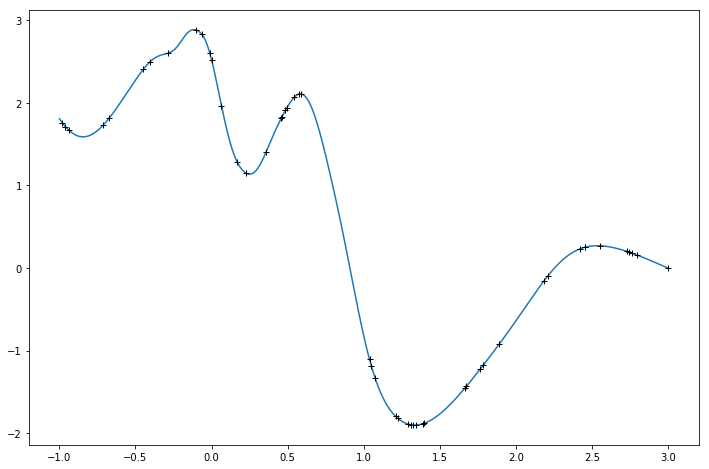

In [11]:
bench = RandomNN(1,3,50,nn.Tanh())
bench.rand_normal_weight(0.6)
num_plot  = 1000
num_train = 50
x = torch.linspace(-1,3,num_plot)[:,None]
y = bench(x).detach()
train_id = np.random.permutation(num_plot)[:num_train]
train_x = x[train_id]
train_y = y[train_id]
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')

In [12]:
conf = dict()
conf['num_epochs'] = 1600
conf['num_hidden'] = 50
conf['num_layers'] = 3
conf['batch_size'] = 128


conf['dropout_rate'] = 0.01
conf['lr']           = 0.01
conf['tau']          = 1.5 #0.15
conf['lscale']       = 0.25


model = BNN_Dropout(1,nn.Tanh(), conf)

conf_hmc = dict()
hmc_model = BNN_SGDHMC(dim = 1, act = nn.Tanh(), conf = conf_hmc)
kern = GPy.kern.RBF(input_dim = 1)
gp = GPy.models.GPRegression(X=train_x.numpy(), Y= train_y.detach().numpy(), kernel=kern)
gp.likelihood.variance = 1e-2

conf_svi = dict()
conf_svi['num_iters'] = 2000
conf_svi['lr'] = 1e-2
conf_svi['num_layers'] = 3
conf_svi['log_noise_mean'] = -2
conf_svi['num_hidden'] = 10
conf_svi['weight_prior'] = 0.6
conf_svi['bias_prior'] = 1
svi_model = BNN_SVI(dim = 1, act = nn.Tanh(), conf = conf_svi)

In [13]:
svi_model.train(train_x, train_y)
hmc_model.train(train_x, train_y)
model.train(train_x, train_y)
gp.optimize()

[Iteration 00001] loss: 19.2168
[Iteration 00101] loss: 26.5909
[Iteration 00201] loss: 102.4666
[Iteration 00301] loss: 20.2642
[Iteration 00401] loss: 13.2287
[Iteration 00501] loss: 41.2637
[Iteration 00601] loss: 79.5529
[Iteration 00701] loss: 20.9427
[Iteration 00801] loss: 57.8452
[Iteration 00901] loss: 18.3067
[Iteration 01001] loss: 8.9222
[Iteration 01101] loss: 5.9281
[Iteration 01201] loss: 9.4810
[Iteration 01301] loss: 9.7738
[Iteration 01401] loss: 11.9178
[Iteration 01501] loss: 45.3669
[Iteration 01601] loss: 27.7048
[Iteration 01701] loss: 58.7978
[Iteration 01801] loss: 13.8919
[Iteration 01901] loss: 9.7408


Step      100 : NLL =  8.4915e+02 MSE = 5.1616e+00 Time =  0.48
Step      200 : NLL =  7.7857e+02 MSE = 5.0692e+00 Time =  1.09
Step      300 : NLL =  9.5062e+02 MSE = 5.1604e+00 Time =  1.57
Step      400 : NLL =  1.1345e+03 MSE = 5.1350e+00 Time =  2.11
Step      500 : NLL =  1.4009e+03 MSE = 5.1546e+00 Time =  2.60
Step      600 : NLL =  1.7369e+03 MSE = 5.1527e+00 Time =  3.09
Step      700 : NLL =  2.1240e+03 MSE = 5.1426e+00 Time =  3.57
Step      800 : NLL =  2.5929e+03 MSE = 5.1356e+00 Time =  4.04
Step      900 : NLL =  3.1709e+03 MSE = 5.1014e+00 Time =  4.52
Step     1000 : NLL =  3.8796e+03 MSE = 5.1522e+00 Time =  4.99
Step     1100 : NLL =  4.8739e+03 MSE = 5.2035e+00 Time =  5.46
Step     1200 : NLL =  5.8431e+03 MSE = 5.1265e+00 Time =  6.08
Step     1300 : NLL =  7.0519e+03 MSE = 5.0856e+00 Time =  6.75
Step     1400 : NLL =  8.7280e+03 MSE = 5.1525e+00 Time =  7.23
Step     1500 : NLL =  1.0655e+04 MSE = 5.1380e+00 Time =  7.71
Step     1600 : NLL =  1.2579e+04 MSE = 

 /mnt/c/code/pybnn/pybnn/bohamiann.py:119: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Step     2100 : NLL =  2.6498e+04 MSE = 5.1515e+00 Samples= 1 Time = 10.77
Step     2200 : NLL =  9.5384e+03 MSE = 5.1341e+00 Samples= 3 Time = 11.28
Step     2300 : NLL =  8.9044e+03 MSE = 5.1433e+00 Samples= 5 Time = 11.80
Step     2400 : NLL =  9.5657e+03 MSE = 5.1458e+00 Samples= 7 Time = 12.32
Step     2500 : NLL =  9.4988e+03 MSE = 5.1493e+00 Samples= 9 Time = 12.75
Step     2600 : NLL =  9.5869e+03 MSE = 5.1516e+00 Samples= 11 Time = 13.26
Step     2700 : NLL =  1.0211e+04 MSE = 5.1529e+00 Samples= 13 Time = 13.73
Step     2800 : NLL =  9.3145e+03 MSE = 5.1500e+00 Samples= 15 Time = 14.21
Step     2900 : NLL =  8.9148e+03 MSE = 5.1488e+00 Samples= 17 Time = 14.66
Step     3000 : NLL =  9.1996e+03 MSE = 5.1515e+00 Samples= 19 Time = 15.13
Step     3100 : NLL =  9.6246e+03 MSE = 5.1527e+00 Samples= 21 Time = 15.64
Step     3200 : NLL =  1.0007e+04 MSE = 5.1538e+00 Samples= 23 Time = 16.13
Step     3300 : NLL =  1.0367e+04 MSE = 5.1546e+00 Samples= 25 Time = 16.66
Step     3400 : N

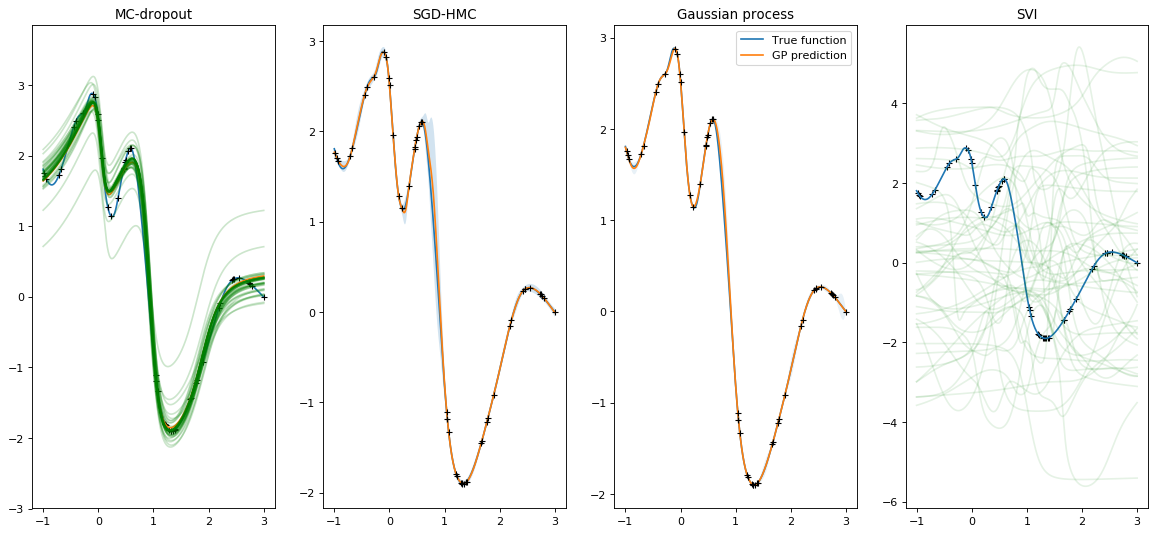

In [14]:
#py = model.predict(x)
py,pv = model.predict_mv(x)
ps = torch.sqrt(pv)
m_hmc,v_hmc = hmc_model.predict_mv(x)
m_hmc = m_hmc.detach().numpy().reshape(num_plot)
s_hmc   = v_hmc.sqrt().detach().numpy().reshape(num_plot)
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')


plt.subplot(141)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(),py.detach().numpy(),label = 'Pred')
plt.fill_between(
    x.numpy().reshape(num_plot), 
    (py - ps).reshape(num_plot).detach().numpy(), 
    (py + ps).reshape(num_plot).detach().numpy(), alpha = 0.0)
for i in range(50):
    net = model.sample()
    py  = net((x - model.x_mean) / model.x_std) * model.y_std + model.y_mean
    plt.plot(x.numpy(),py.detach().numpy(), 'g', alpha = 0.2)
plt.title('MC-dropout')

plt.subplot(142)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(x.numpy(), m_hmc)
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.fill_between(x.numpy().reshape(num_plot), m_hmc +3* s_hmc, m_hmc -3* s_hmc, alpha = 0.2)
plt.title('SGD-HMC')

plt.subplot(143)
gp_m, gp_v = gp.predict(x.numpy())
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')
plt.plot(x.numpy(), gp_m, label = 'GP prediction')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.fill_between(x.numpy().reshape(num_plot), (gp_m - 3 * np.sqrt(gp_v)).reshape(num_plot), (gp_m + 3 * np.sqrt(gp_v)).reshape(num_plot), alpha = 0.1)
plt.legend()
plt.title('Gaussian process')


plt.subplot(144)
plt.title('SVI')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')

num_samples = 50;
for i in range(50):
    r_net = svi_model.sample()
    py     = svi_model.sample_predict(r_net,x)
    
    plt.plot(x.numpy(), py.detach().numpy(),'g',alpha = 0.1)

In [13]:
xs = torch.linspace(-10,10,1000)
f = nn.Softplus()

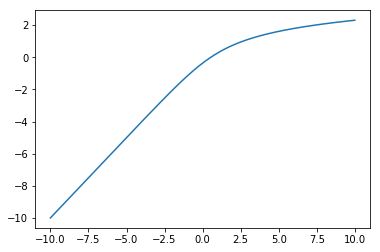

In [18]:
plt.plot(xs.numpy(), f(xs).log().detach().numpy())

In [16]:
f(xs).min()

tensor(4.5399e-05)